In [2]:
import ugradio
import ugradio.timing as time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import astropy
from astropy.table import Table

%matplotlib inline
plt.rcParams['mathtext.fontset'], plt.rcParams['font.family'] = 'stix', 'STIXGeneral'
plt.rcParams.update({'font.size': 17})

### Data

In [3]:
on_line_data = np.load('Data_lab2/on_line_raw.npy')
off_line_data = np.load('Data_lab2/off_line_raw.npy')

In [68]:
cold_data = np.load('Data_lab2/cold_raw_zenith.npy')
cal_data = np.load('Data_lab2/cal_raw_zenith.npy')

# 7.1 Take a Suitable Average/Median

In [4]:
nsamples = 2048
vs = 2.2   # [MHz]
freqs = np.fft.fftshift(np.fft.fftfreq(nsamples, 1/vs))

### Averaging Method

In [34]:
fft_on = np.fft.fftshift(np.fft.fft(on_line_data))
fft_off = np.fft.fftshift(np.fft.fft(off_line_data))

power_on = np.abs(fft_on)**2
power_off = np.abs(fft_off)**2

avg_on = np.mean(power_on, axis=0)
avg_off = np.mean(power_off, axis=0)

In [35]:
power_on.shape, avg_on.shape

((10000, 2048), (2048,))

### Median Method

In [9]:
med_on = np.median(power_on, axis=0)
med_off = np.median(power_off, axis=0)

In [37]:
med_on.shape

(2048,)

### Comparison of Averaging/Median Methods

<Figure size 432x288 with 0 Axes>

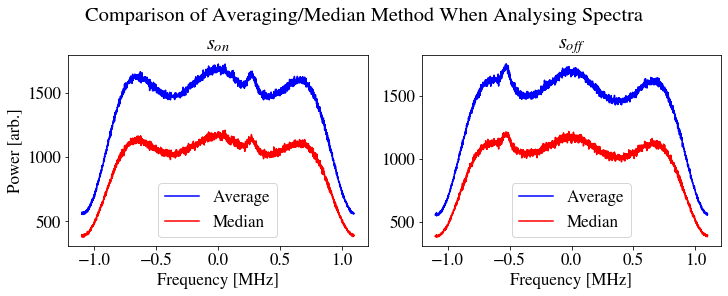

In [61]:
plt.figure()
fig, (ax0, ax1) = plt.subplots(1,2, figsize=(10,4), constrained_layout=True)
plt.suptitle('Comparison of Averaging/Median Method When Analysing Spectra')

ax0.set_title('$s_{on}$')
ax0.plot(freqs, avg_on, 'b', label='Average')
#ax0.semilogy(freqs, med_on + (avg_on - med_on), 'r', label='Median', alpha=0.5)
ax0.plot(freqs, med_on, 'r', label='Median')
ax0.set_xlabel('Frequency [MHz]')
ax0.legend()
ax0.set_ylabel('Power [arb.]')

ax1.set_title('$s_{off}$')
ax1.plot(freqs, avg_off, 'b', label='Average')
#ax1.semilogy(freqs, med_off + (avg_off - med_off), 'r', label='Median', alpha=0.5)
ax1.plot(freqs, med_off, 'r', label='Median')
ax1.set_xlabel('Frequency [MHz]')
ax1.legend()

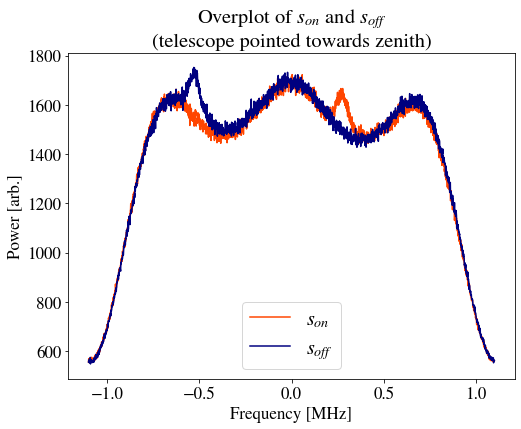

In [117]:
plt.figure(figsize=(8,6))
plt.title('Overplot of $s_{on}$ and $s_{off}$\n(telescope pointed towards zenith)')
plt.plot(freqs, avg_on, color='orangered', label='$s_{on}$')
plt.plot(freqs, avg_off, color='navy', label='$s_{off}$')
plt.legend(fontsize=20)
plt.xlabel('Frequency [MHz]')
plt.ylabel('Power [arb.]')
plt.show()

# 7.2 Get the Line Shape

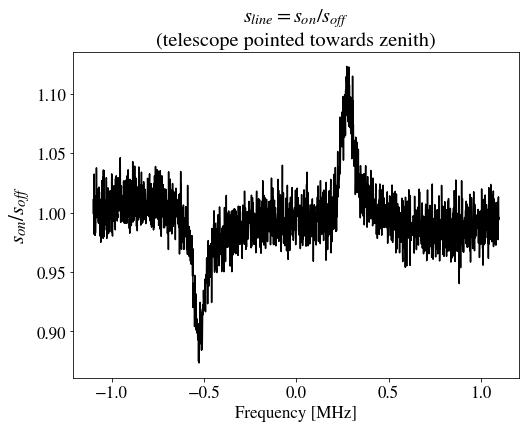

In [113]:
s_line = avg_on/avg_off

plt.figure(figsize=(8,6))
plt.plot(freqs, s_line, 'k')
plt.title('$s_{line}=s_{on}/s_{off}$\n(telescope pointed towards zenith)')
plt.ylabel('$s_{on}/s_{off}$', fontsize=21)
plt.xlabel('Frequency [MHz]')
plt.show()

# 7.3 Get the Line Intesity

In [69]:
cold_data.shape, cal_data.shape #nblocks=1000

((1000, 2048), (1000, 2048))

In [70]:
fft_cold = np.fft.fftshift(np.fft.fft(cold_data))
fft_cal = np.fft.fftshift(np.fft.fft(cal_data))

power_cold = np.abs(fft_cold)**2
power_cal = np.abs(fft_cal)**2

avg_cold = np.mean(power_cold, axis=0)
avg_cal = np.mean(power_cal, axis=0)

### Plotting the data

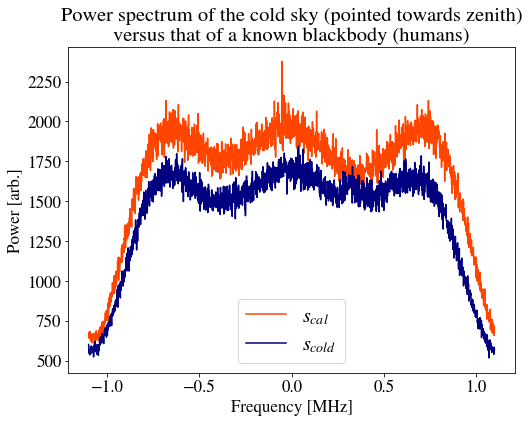

In [114]:
plt.figure(figsize=(8,6))
plt.plot(freqs, avg_cal, 'orangered', label='$s_{cal}$')
plt.plot(freqs, avg_cold, 'navy', label='$s_{cold}$')
plt.legend(fontsize=20)
plt.xlabel('Frequency [MHz]')
plt.ylabel('Power [arb.]')
plt.title('Power spectrum of the cold sky (pointed towards zenith)\nversus that of a known blackbody (humans)')
plt.show()

### Finding the gain

In [118]:
dtemp = np.mean(np.fft.fftshift(avg_cal-avg_cold)[:1400]) # Dont want to include HI line in calculation
G = 300/dtemp
print('Gain = {0:.3f}'.format(G))

Gain = 1.281


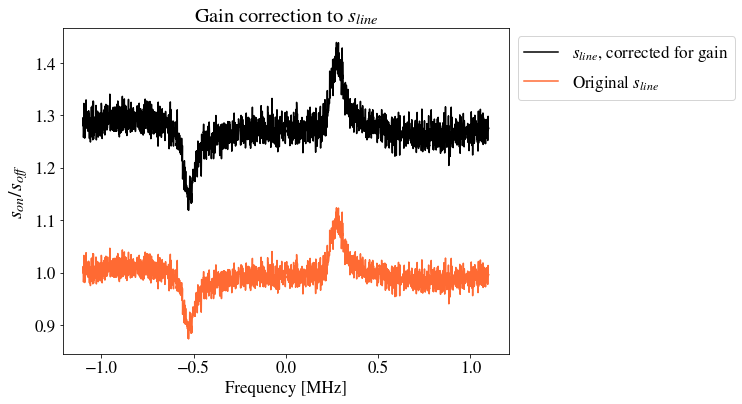

In [112]:
T_line = s_line*G

plt.figure(figsize=(8,6))
plt.plot(freqs, T_line, 'k', label='$s_{line}$, corrected for gain')
plt.plot(freqs, s_line, 'orangered', alpha=0.8, label='Original $s_{line}$')
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.title('Gain correction to $s_{line}$')
plt.xlabel('Frequency [MHz]')
plt.ylabel('$s_{on}/s_{off}$', fontsize=20)
plt.show()

# 7.4 Plotting Intesity vs. Frequency - and Velocity

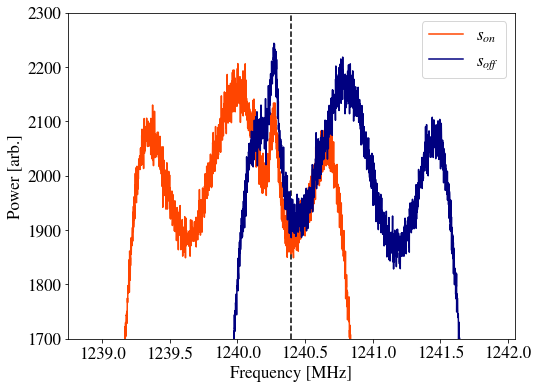

In [139]:
plt.figure(figsize=(8,6))
plt.plot(freqs+1240, avg_on*G, color='orangered', label='$s_{on}$')
plt.plot(freqs+1240.8, avg_off*G, color='navy', label='$s_{off}$')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Power [arb.]')
plt.vlines(1240.4, 1700, 2300, color='k', linestyle='--')
plt.ylim(1700, 2300)
plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

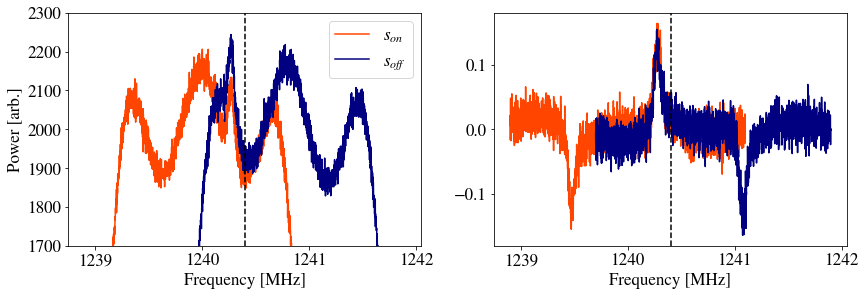

In [155]:
plt.figure()
fig, (ax0, ax1) = plt.subplots(1,2, figsize=(12,4), constrained_layout=True)
#plt.suptitle('')

#ax0.set_title('')
ax0.plot(freqs+1240, avg_on*G, color='orangered', label='$s_{on}$')
ax0.plot(freqs+1240.8, avg_off*G, color='navy', label='$s_{off}$')
ax0.set_xlabel('Frequency [MHz]')
ax0.legend()
ax0.set_ylabel('Power [arb.]')
ax0.axvline(1240.4, color='k', linestyle='--')
ax0.set_ylim(1700, 2300)

#ax1.set_title('')
ax1.plot(freqs+1240, (s_line-np.median(s_line))*G, 'orangered', label='$s_{on}$')
ax1.plot(freqs+1240.8, -((s_line-np.median(s_line))*G), 'navy', label='$s_{off}$')
ax1.set_xlabel('Frequency [MHz]')
ax1.axvline(1240.4, color='k', linestyle='--')
#ax1.legend()

plt.show()